In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [31]:
tasmania_df = pd.read_csv('Data_sets/Adelaide_Data.csv')

tasmania_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

tasmania_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.00000,71998.000000,71998.000000,71998.000000,71998.000000,...,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,7.199800e+04
mean,281.278434,279.316799,294.138170,263.820014,290.190835,246.81052,252.474533,322.613080,280.746168,288.405246,...,88436.614802,88332.383742,87564.257977,88660.580440,88425.330170,87185.332906,87704.044108,89191.016479,88471.341006,1.410073e+06
std,178.320730,178.037942,182.138518,194.869224,179.635262,191.37862,178.340115,178.435158,190.274938,178.158481,...,10108.714997,10156.727576,10174.942637,10515.851087,10489.615606,10565.592524,10430.137566,10442.295312,10572.653000,5.600749e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,51444.747000,51304.021600,49409.891500,49814.045300,51660.410600,50205.352800,51141.599700,50628.552800,47273.983600,1.191378e+06
25%,117.006825,116.477225,116.269200,76.570500,123.092425,67.49445,89.111750,166.917500,103.627400,126.430400,...,81445.599325,81102.055325,80546.816775,80803.156425,80789.259225,79083.946125,79920.262800,81584.169325,80400.514400,1.371209e+06
50%,282.731850,280.674850,315.467050,247.231900,286.194300,214.91815,233.673750,356.337700,267.173600,288.203900,...,90310.888500,90083.739600,88073.889100,91008.722450,89940.659550,87663.436400,89004.129150,92113.493100,90698.590550,1.402170e+06
75%,437.294500,444.122000,455.154275,444.659350,460.148200,433.31165,408.797950,481.671800,464.014100,448.372850,...,97418.742850,97448.086300,97336.088325,97813.297875,97720.390650,97475.936600,97501.542600,98072.961125,97663.106325,1.446065e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.00000,566.000000,566.000000,566.000000,566.000000,...,105790.374500,105526.299600,105420.107400,105395.279300,105539.986600,105447.760000,105301.202500,104602.318800,105390.327100,1.583052e+06


In [32]:
from sklearn.preprocessing import StandardScaler



In [36]:
columns_to_remove = [f"P{i}" for i in range(1, 17)]
tasmania_df = tasmania_df.drop(columns=columns_to_remove)
scaler = StandardScaler()

# Standaryzacja danych
tasmania_scaled = scaler.fit_transform(tasmania_df)

# Przekształcenie z powrotem na DataFrame z zachowaniem nazw kolumn
tasmania_scaled_df = pd.DataFrame(tasmania_scaled, columns=tasmania_df.columns)

tasmania_scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Power_all
0,1.396567,-1.182979,-1.441440,-0.454471,1.257853,-0.958031,-1.039477,0.262481,-1.401420,0.488563,...,-0.048702,0.681635,0.755429,-0.595017,1.244705,0.057216,1.588264,-0.425464,1.436078,-1.234549
1,-1.423746,0.672513,1.490893,0.668281,-0.946181,1.626728,1.648421,-1.654884,0.175321,-0.294446,...,1.299915,0.789071,-1.378685,-0.635348,-1.391320,0.259937,-1.409787,1.030572,0.522050,-1.036329
2,0.363809,-1.233899,-0.372598,0.087698,0.623631,-0.146791,-0.254761,0.095018,-1.475487,-1.618824,...,-0.218677,1.488084,0.396919,-1.441485,-0.171880,-0.499567,0.226794,-0.282903,-1.278408,-0.237807
3,0.205451,1.530793,0.226952,-1.148450,0.147175,0.620935,0.918653,1.342176,-0.364677,-0.815458,...,1.505231,-0.811180,-1.304128,-0.848602,0.398456,1.418902,1.046733,-1.306995,0.568822,-0.970675
4,0.498413,0.895323,-0.394212,-0.567867,0.776995,1.212108,0.284259,0.708120,-0.955923,-1.450499,...,0.894689,-0.190836,-0.659555,-1.441485,-0.216543,0.802887,0.409644,-0.706386,-0.031331,-1.812756


<Axes: >

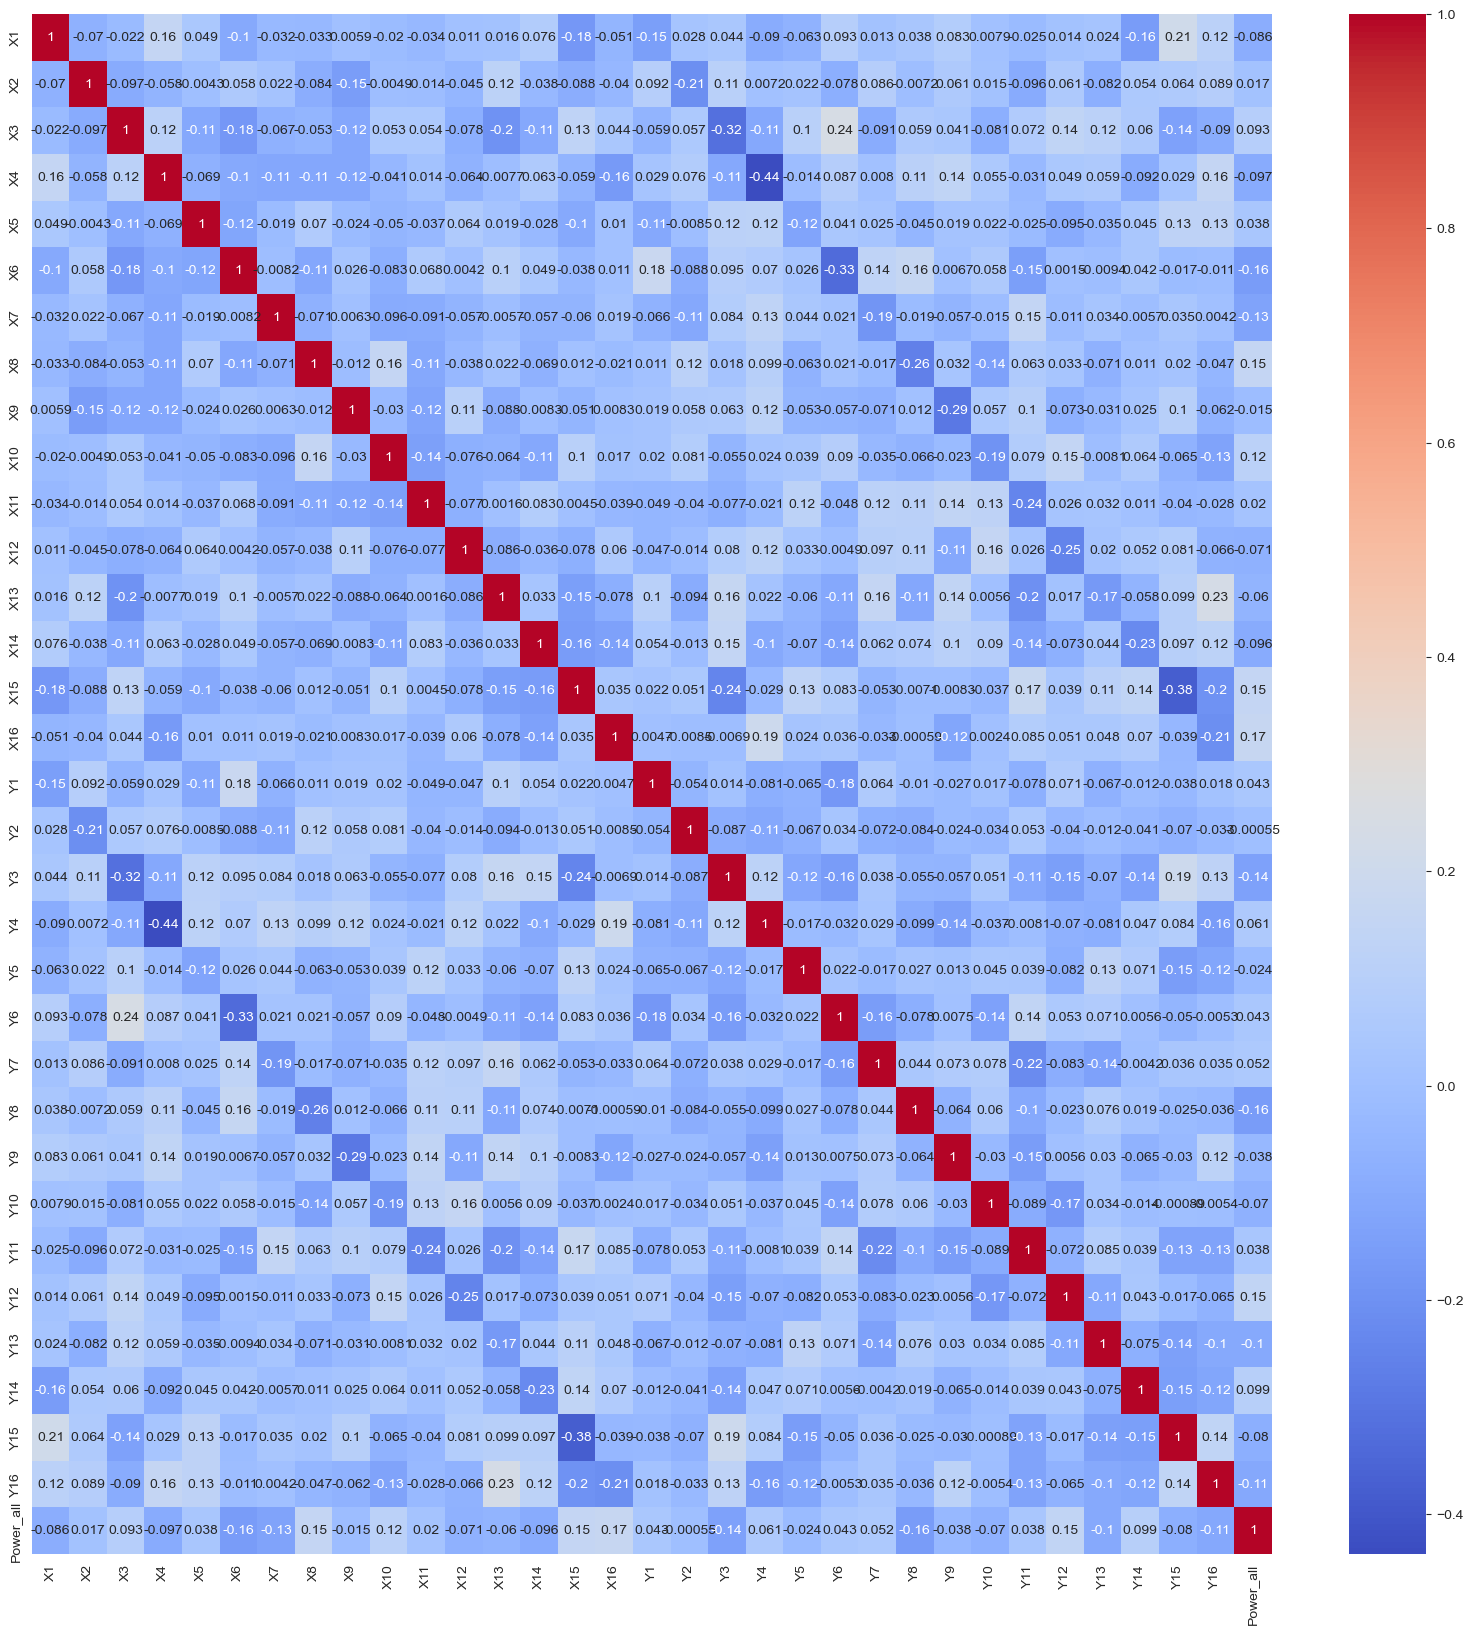

In [37]:
correlation_matrix = tasmania_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)


Kolumny usunięte: {'Y12', 'Y16', 'X16', 'X12', 'Y9', 'Y5', 'Y7', 'Y14', 'Y6', 'Y8', 'X10', 'X3', 'X13', 'X14', 'X9', 'X4', 'X6', 'Y1', 'Y4', 'Y2', 'Y10', 'X15', 'Y15', 'Y3', 'X7', 'X8', 'X11', 'Y11', 'X2', 'Y13', 'Power_all', 'X5'}
